In [47]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import math
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('dataset.csv')
# data= (data- data.min())/data.std()
data= ((data-data.min())/data.max()-data.min())

print(data.shape)
data.head()

(434874, 3)


,Longitude,Latitude,Altitude
0,-8.038644,-56.579743,8.799054
1,-8.038614,-56.579746,8.803235
2,-8.038582,-56.579749,8.806721
3,-8.038559,-56.579750,8.808178
4,-8.038537,-56.579750,8.809246


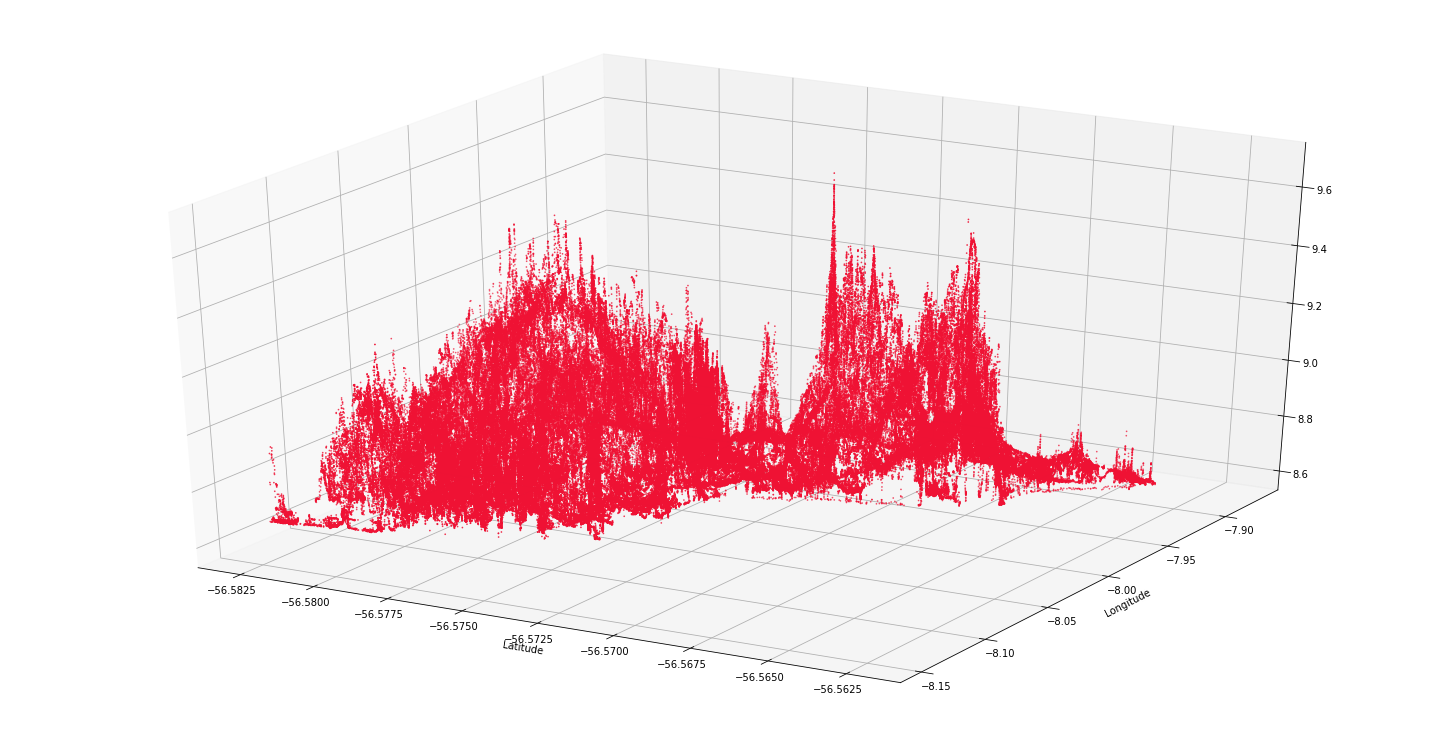

In [48]:
lat = data['Latitude'].values
lon = data['Longitude'].values
alt = data['Altitude'].values
# latm= np.mean(lat)



# Ploting the scores as scatter plot
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(lat,lon, alt, color='#ef1234',s=0.5)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

In [45]:
l = len(lat)
# print(l)
x0 = np.ones(l)
X = np.array([x0, lat, lon]).T
# Initial Coefficients
B = np.array([-4.04293715e-19 ,-2.08063447e-18 , 1.00000000e+00])
Y = np.array(alt)
Y_pred=np.zeros(len(alt))
Bnew=np.array([0,0,0])
alpha = 0.0001

In [46]:
def cost_function(X, Y, B):
    m = len(Y)
#     print(m)
    J = np.sum((X.dot(B) - Y) ** 2)/(2 * m)
    return J

In [5]:
def StochasticGradientDescent(X,Y,B,alpha,iterations):
    cost_history = [0] * iterations
#     weights=[]
    m=len(Y)
    
    for i in range(iterations):
        h=np.dot(X[i%m],B)
        error=h-Y[i%m]
        B=B-(alpha * X[i%m].dot(error))
        c= (1/(2*m)) * np.sum((X.dot(B)-Y)**2)
        cost = cost_function(X, Y, B)
        cost_history[i] = cost
        
    return B,cost_history

Coefficients for Stochastic gradient descent:  [ 0.00515598 -0.29172651  0.95857919]
Cost 0.010651441129763482


Text(0.5, 1.0, 'LOSS VS ITERATIONS GRAPH FOR SGD')

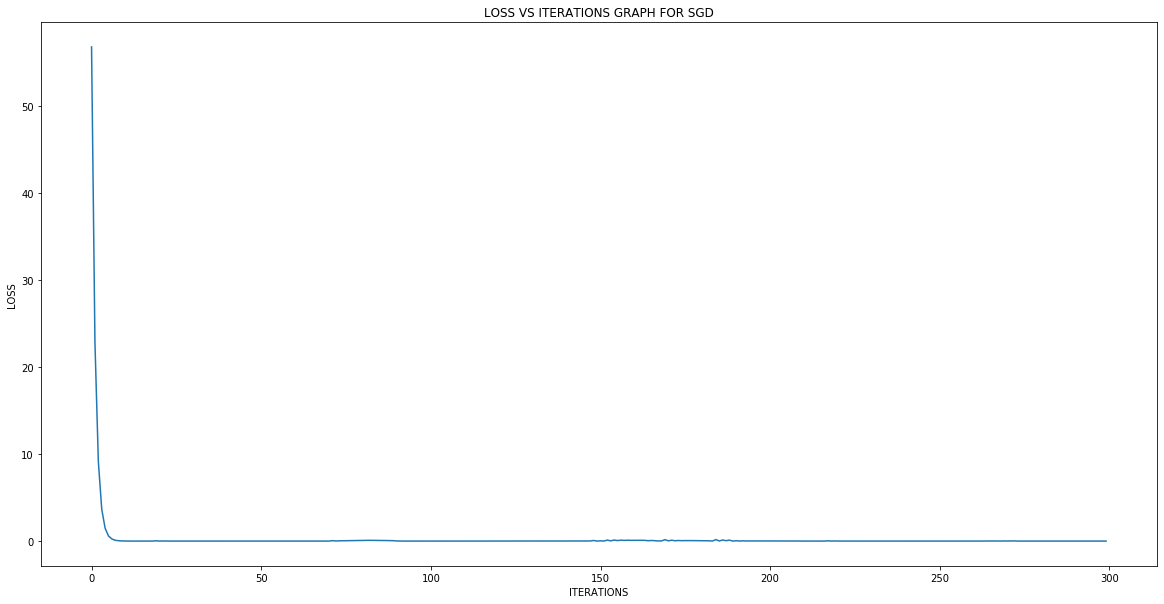

In [66]:
newB1, cost_history = StochasticGradientDescent(X, Y, B,0.0005, 300)
# New Values of B
print("Coefficients for Stochastic gradient descent: ",newB1)

# Final Cost of new B
print("Cost",cost_history[-1])
plt.plot(cost_history)
plt.xlabel("ITERATIONS")
plt.ylabel("LOSS")
plt.title("LOSS VS ITERATIONS GRAPH FOR SGD")

In [67]:
def rmse(Y, Y_pred):
    rmse = np.sqrt(sum((Y - Y_pred) ** 2) / len(Y))
    return rmse

# Model Evaluation - R2 Score
def r2_score(Y, Y_pred):
    mean_y = np.mean(Y)
#     print(mean_y)
    ss_tot = sum((Y) ** 2)
    ss_res = sum((Y - Y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

Y_pred = X.dot(newB1)

print("RMS ERROR: ",rmse(Y, Y_pred))
print("R squared value:",r2_score(Y, Y_pred))

RMS ERROR:  0.1459550693176726
R squared value: 0.9997272911065366
